In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
netflix=pd.read_csv('movies.csv',lineterminator='\n')

In [58]:
netflix.head()

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [63]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


info for cheaking genres 

In [64]:
netflix['genres'].head(10)

0          Action|Drama|War
1                       War
2           Biography|Drama
3               Crime|Drama
4                     Drama
5                     Drama
6              Comedy|Drama
7        Comedy|Crime|Drama
8    Action|Biography|Drama
9           Biography|Drama
Name: genres, dtype: object

In [65]:
# cheak any data is duplicate 
netflix.duplicated().sum()

np.int64(0)

In [66]:
# describe this is the function only describe about statatics value
netflix.describe()

,is_adult,year_of_release,imdb_rating,imdb_votes
count,1629.0,1629.000000,1629.000000,1629.000000
mean,0.0,2010.263966,5.557459,5384.263352
std,0.0,5.381542,1.567609,14552.103231
min,0.0,2001.000000,0.000000,0.000000
25%,0.0,2005.000000,4.400000,233.000000
50%,0.0,2011.000000,5.600000,1000.000000
75%,0.0,2015.000000,6.800000,4287.000000
max,0.0,2019.000000,9.400000,310481.000000


# Data Preprocessing 

clean and deleat unwanted colume and Row

#Exploration Summary

■ we have a datagrame consisting of 1629 rows and 18 columns.

■ Our dataset looks a bit tidy with no NaNs nor duplicated values

■ Release_Date column needs to basted into data time and to extraxt only the year value and data type change object to datatype

■ Overview , original, language and Poster_url wouldn't be so useful durning analysis , so we'll drop then there is noticable outliers in Popularity colum

■ Genre column has '|' saperated values that needs to be handled and casted into 
category.Exploration summary



In [67]:
netflix['year_of_release'].dtypes   # chnage the data types

dtype('int64')

In [68]:
netflix['year_of_release'] = pd.to_datetime(netflix['year_of_release'])

print(netflix['year_of_release'].dtypes)

datetime64[ns]


In [69]:
netflix['year_of_release'] = netflix['year_of_release'].dt.year

In [70]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int32  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


# cleanning 

In [71]:
netflix.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,1970,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,1970,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [72]:
netflix.columns

Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')

In [73]:
# we have threee title and imdf_id pster_path 
cols =['title_x','imdb_id', 'poster_path', 'wiki_link', 'title_y', 'is_adult','story', 'tagline',  'wins_nominations', 'release_date']

netflix.drop(cols , axis=1 , inplace=True)

In [74]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   1629 non-null   object 
 1   year_of_release  1629 non-null   int32  
 2   runtime          1629 non-null   object 
 3   genres           1629 non-null   object 
 4   imdb_rating      1629 non-null   float64
 5   imdb_votes       1629 non-null   int64  
 6   summary          1629 non-null   object 
 7   actors           1624 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 95.6+ KB


In [75]:
# cheaking nan value
netflix.isna().sum()

original_title     0
year_of_release    0
runtime            0
genres             0
imdb_rating        0
imdb_votes         0
summary            0
actors             5
dtype: int64

In [76]:
netflix.dropna(inplace= True)

In [77]:
netflix.isna().sum()

original_title     0
year_of_release    0
runtime            0
genres             0
imdb_rating        0
imdb_votes         0
summary            0
actors             0
dtype: int64

In [78]:
netflix.head()

,original_title,year_of_release,runtime,genres,imdb_rating,imdb_votes,summary,actors
0,Uri: The Surgical Strike,1970,138,Action|Drama|War,8.4,35112,Indian army special forces execute a covert op...,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...
1,Battalion 609,1970,131,War,4.1,73,The story of Battalion 609 revolves around a c...,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...
2,The Accidental Prime Minister,1970,112,Biography|Drama,6.1,5549,Explores Manmohan Singh's tenure as the Prime ...,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...
3,Why Cheat India,1970,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...
4,Evening Shadows,1970,102,Drama,7.3,280,Under the 'Evening Shadows' truth often plays...,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...


I had split genres into a list and then explode our dataframe to have only one genre per row for each movie

# Data Visualization

In [81]:
netflix['genres'].describe()

count      1624
unique      204
top       Drama
freq        161
Name: genres, dtype: object

In [87]:
sns.hisplot(y = 'genres',data = netflix, kind='count',order = netflix['genres'].value_counts().index,color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

AttributeError: module 'seaborn' has no attribute 'hisplot'

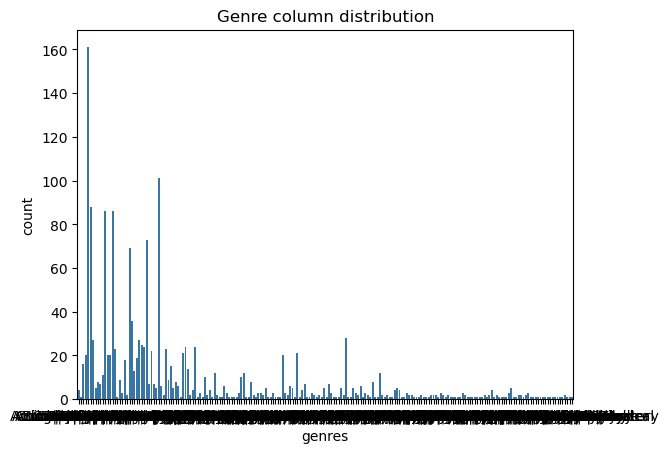

In [89]:
sns.countplot(x='genres', data=netflix, color='#2878B5')
plt.title("Genre column distribution")
plt.show()

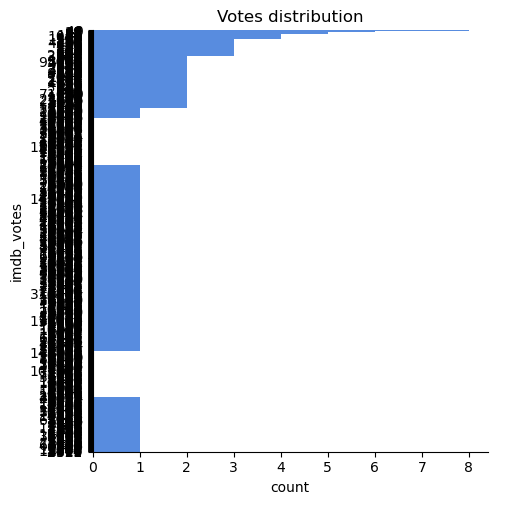

In [85]:
sns.catplot(y = 'imdb_votes' ,data =netflix,kind='count',
            order =netflix['imdb_votes'].value_counts().index,
            color="#4287f5")
plt.title('Votes distribution')
plt.show()